In [7]:
import numpy as np
import pandas as pd
import vcs

In [8]:
x = vcs.init()

In [9]:
#load data
target = pd.read_csv('phenology-targets.csv')
preds_PEG_3_22 = pd.read_csv('phenology-2021-03-22-PEG.csv')
preds_MODIS_3_22 = pd.read_csv('phenology-2021-03-22-Team_MODIS.csv')

In [10]:
target.reset_index(inplace=True)

In [11]:
print(preds_MODIS_3_22['siteID'].unique())
print(target['siteID'].unique())

['BART' 'CLBJ' 'DELA' 'GRSM' 'HARV' 'SCBI' 'STEI' 'UKFS']
['HARV' 'BART' 'SCBI' 'STEI' 'UKFS' 'GRSM' 'DELA' 'CLBJ']


In [12]:
#Select one Site for demo
target_HARV = target[target['siteID']=='HARV']
preds_PEG_3_22_HARV = preds_PEG_3_22[(preds_PEG_3_22['siteID']=='HARV') & (preds_PEG_3_22['statistic']=='mean')]
preds_MODIS_3_22_HARV = preds_MODIS_3_22[preds_MODIS_3_22['siteID']=='HARV']

In [13]:
target_HARV.reset_index(inplace=True)
preds_PEG_3_22_HARV.reset_index(inplace=True)
preds_MODIS_3_22_HARV.reset_index(inplace=True)

In [14]:
preds_PEG_HARV_3_22_corr = preds_PEG_3_22_HARV.corr(method='pearson')['gcc_90'][0]
preds_PEG_HARV_3_22_std = preds_PEG_3_22_HARV['gcc_90'].std()

In [15]:
preds_MODIS_HARV_3_22_corr = preds_MODIS_3_22_HARV.corr(method='pearson')['gcc_90'][0]
preds_MODIS_HARV_3_22_std = preds_MODIS_3_22_HARV['gcc_90'].std()

In [18]:
target_HARV_corr = target_HARV.corr(method='pearson')['gcc_90'][0]
target_HARV_std = target_HARV['gcc_90'].std()

In [66]:
import MV2

corr = [preds_PEG_HARV_3_22_corr]#, preds_MODIS_HARV_3_22_corr , target_HARV_corr]
std = [preds_PEG_HARV_3_22_std]#, preds_MODIS_HARV_3_22_std , target_HARV_std]

data_tmp1 = list(zip(std, corr))
data_tmp2 = list(data_tmp1)

In [67]:
data = MV2.array(data_tmp2)
data.id="Taylor Diagram"

print('data:\n', data)
print('data shape', data.shape)

data:
 [[0.04396035 0.71636768]]
data shape (1, 2)


In [68]:
# Marker Attributes 
ids = ["PEG", "Obs"]
id_sizes = [15., 15., 15.]
id_colors = ["red",'red','red']
symbols = ["dot",'dot','dot']
colors = ['black','black','black']
sizes = [1,1,1]

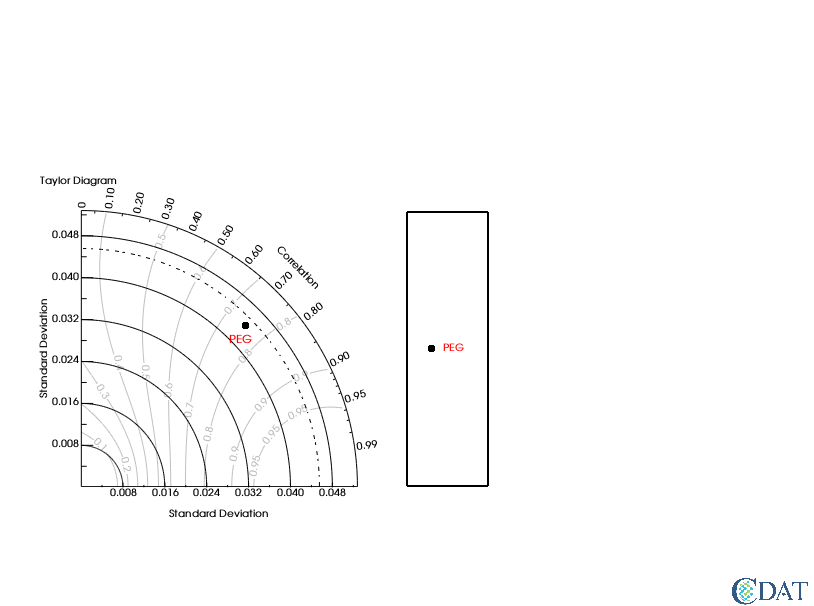

In [69]:
template = vcs.createtemplate(source="deftaylor")
template.legend.x1 = .5
template.legend.x2 = .6
template.legend.y1 = .2
template.legend.y2 = .65
template.legend.line = "black"
template.xtic2.priority = 1
template.ytic2.priority = 0
#template.line3 = vcs.Pboxeslines.Pbl(1)

taylor = vcs.createtaylordiagram()
taylor.referencevalue = target_HARV_std

for i in range(1):
    taylor.addMarker(id=ids[i],
                    id_size=id_sizes[i],
                    id_color=id_colors[i],
                    color=colors[i],
                    size=sizes[i],
                    xoffset=-2.,
                    yoffset=-5.)
    
x.clear()
x.plot(data, taylor, template, skill=taylor.defaultSkillFunction)